In [10]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt
from imutils.video import FPS
import time
from PIL import Image

In [4]:
# importing the pretrained model
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe('MobileNetSSD_deploy.prototxt.txt', 'MobileNetSSD_deploy.caffemodel')
print("[INFO] model loaded...")

[INFO] loading model...
[INFO] model loaded...


In [5]:
# Defining the total classes in which model is trained
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat", 
           "bottle","bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]
# Giving random colors to each class
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [6]:
# Object detection function
def object_detection(image):
#     size of image
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)
    # pass the blob through the network and obtain the detections and
    # predictions
    print("[INFO] computing object detections...")
    net.setInput(blob)
    detections = net.forward()
    # loop over the detections
    for i in np.arange(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]
        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > .60:
            # extract the index of the class label from the `detections`,
            # then compute the (x, y)-coordinates of the bounding box for
            # the object
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            # display the prediction
            label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
            print("[INFO] {}".format(label))
            cv2.rectangle(image, (startX, startY), (endX, endY),
                          COLORS[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(image, label, (startX, y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
    return image



[INFO] computing object detections...
[INFO] dog: 89.02%
[INFO] horse: 98.20%
[INFO] person: 99.95%


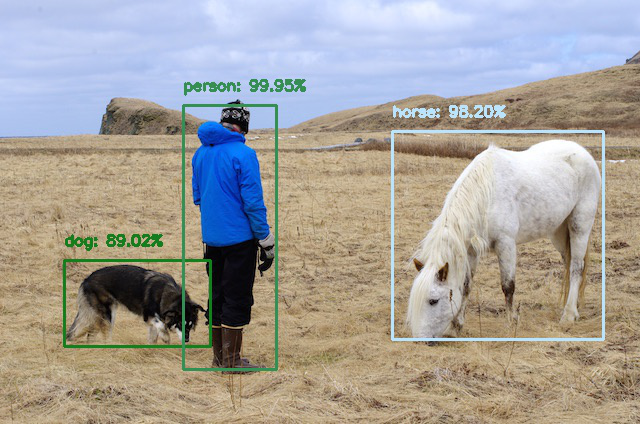

In [12]:
image=cv2.imread('testimages/sample_person.jpg')
image=object_detection(image)
# ploting image after detection
cv2.imwrite('result1.jpg',image)
Image.open('result1.jpg')

In [16]:
from IPython.display import Image,display

path=glob.glob('testimages/*jpg')


for i in path:
    image=cv2.imread(i)
    image=object_detection(image)
    cv2.imwrite('results/result'+i.split('/')[1],image)

[INFO] computing object detections...
[INFO] pottedplant: 96.45%
[INFO] pottedplant: 85.61%
[INFO] computing object detections...
[INFO] person: 99.58%
[INFO] person: 92.80%
[INFO] person: 90.33%
[INFO] person: 88.15%
[INFO] person: 79.89%
[INFO] person: 72.68%
[INFO] person: 61.23%
[INFO] computing object detections...
[INFO] dog: 89.02%
[INFO] horse: 98.20%
[INFO] person: 99.95%
[INFO] computing object detections...
[INFO] aeroplane: 99.13%
[INFO] car: 96.16%
[INFO] computing object detections...
[INFO] train: 91.39%
[INFO] computing object detections...
[INFO] bicycle: 99.98%
[INFO] bicycle: 99.93%


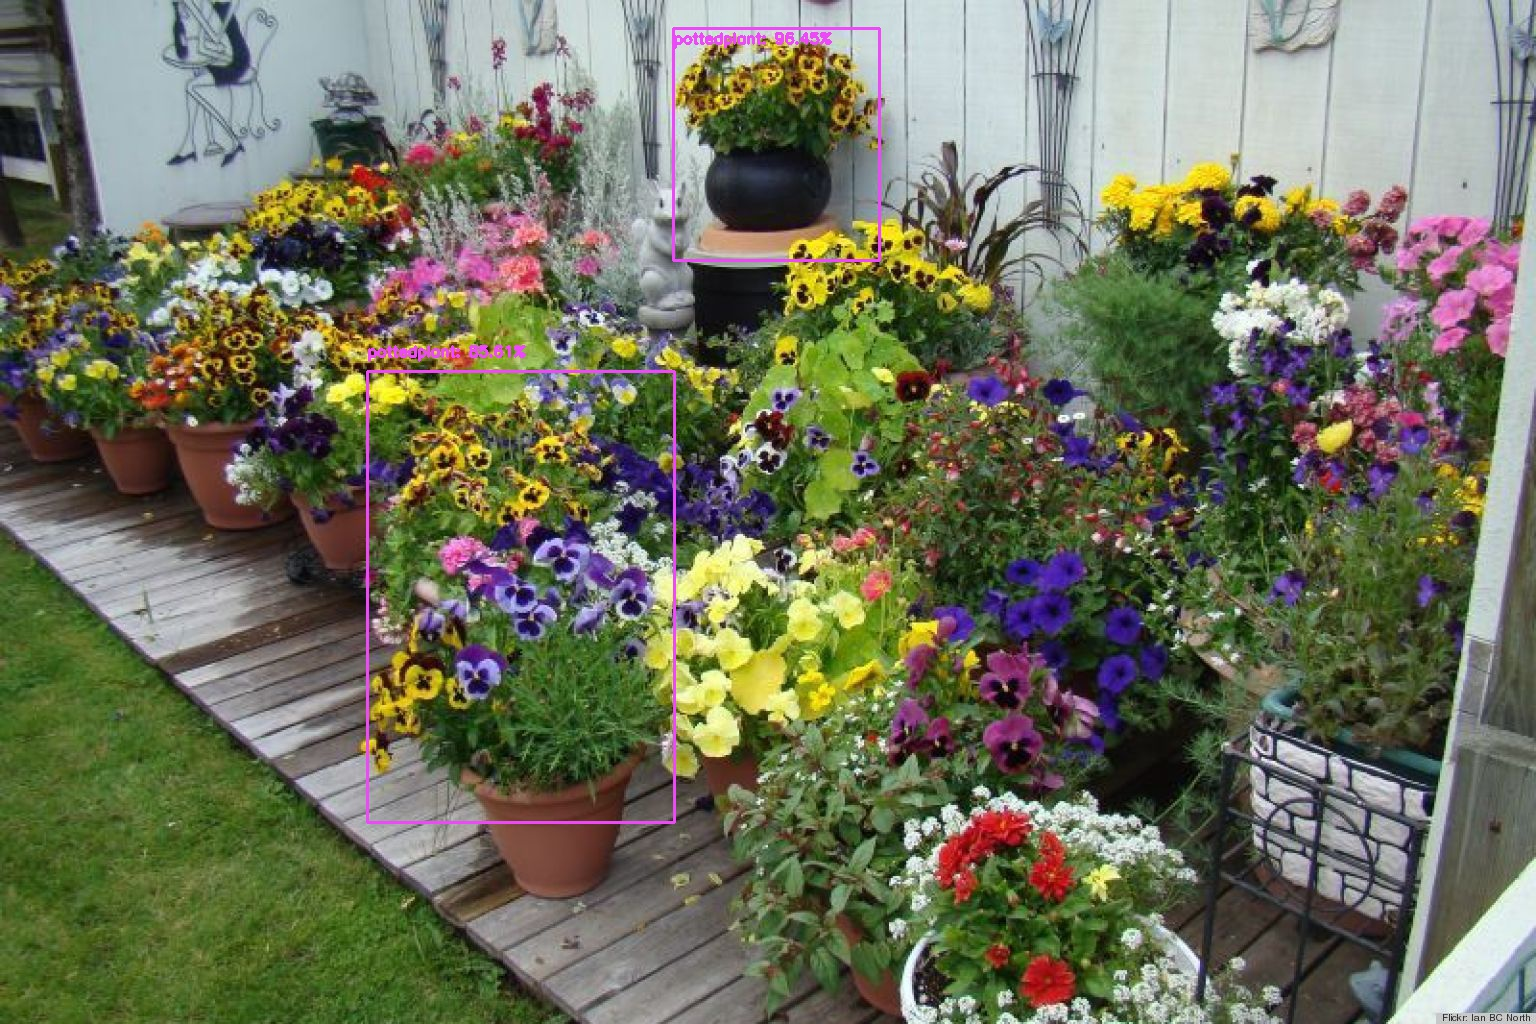

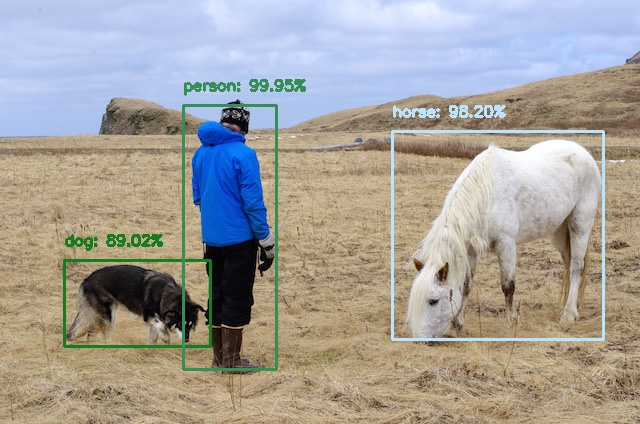

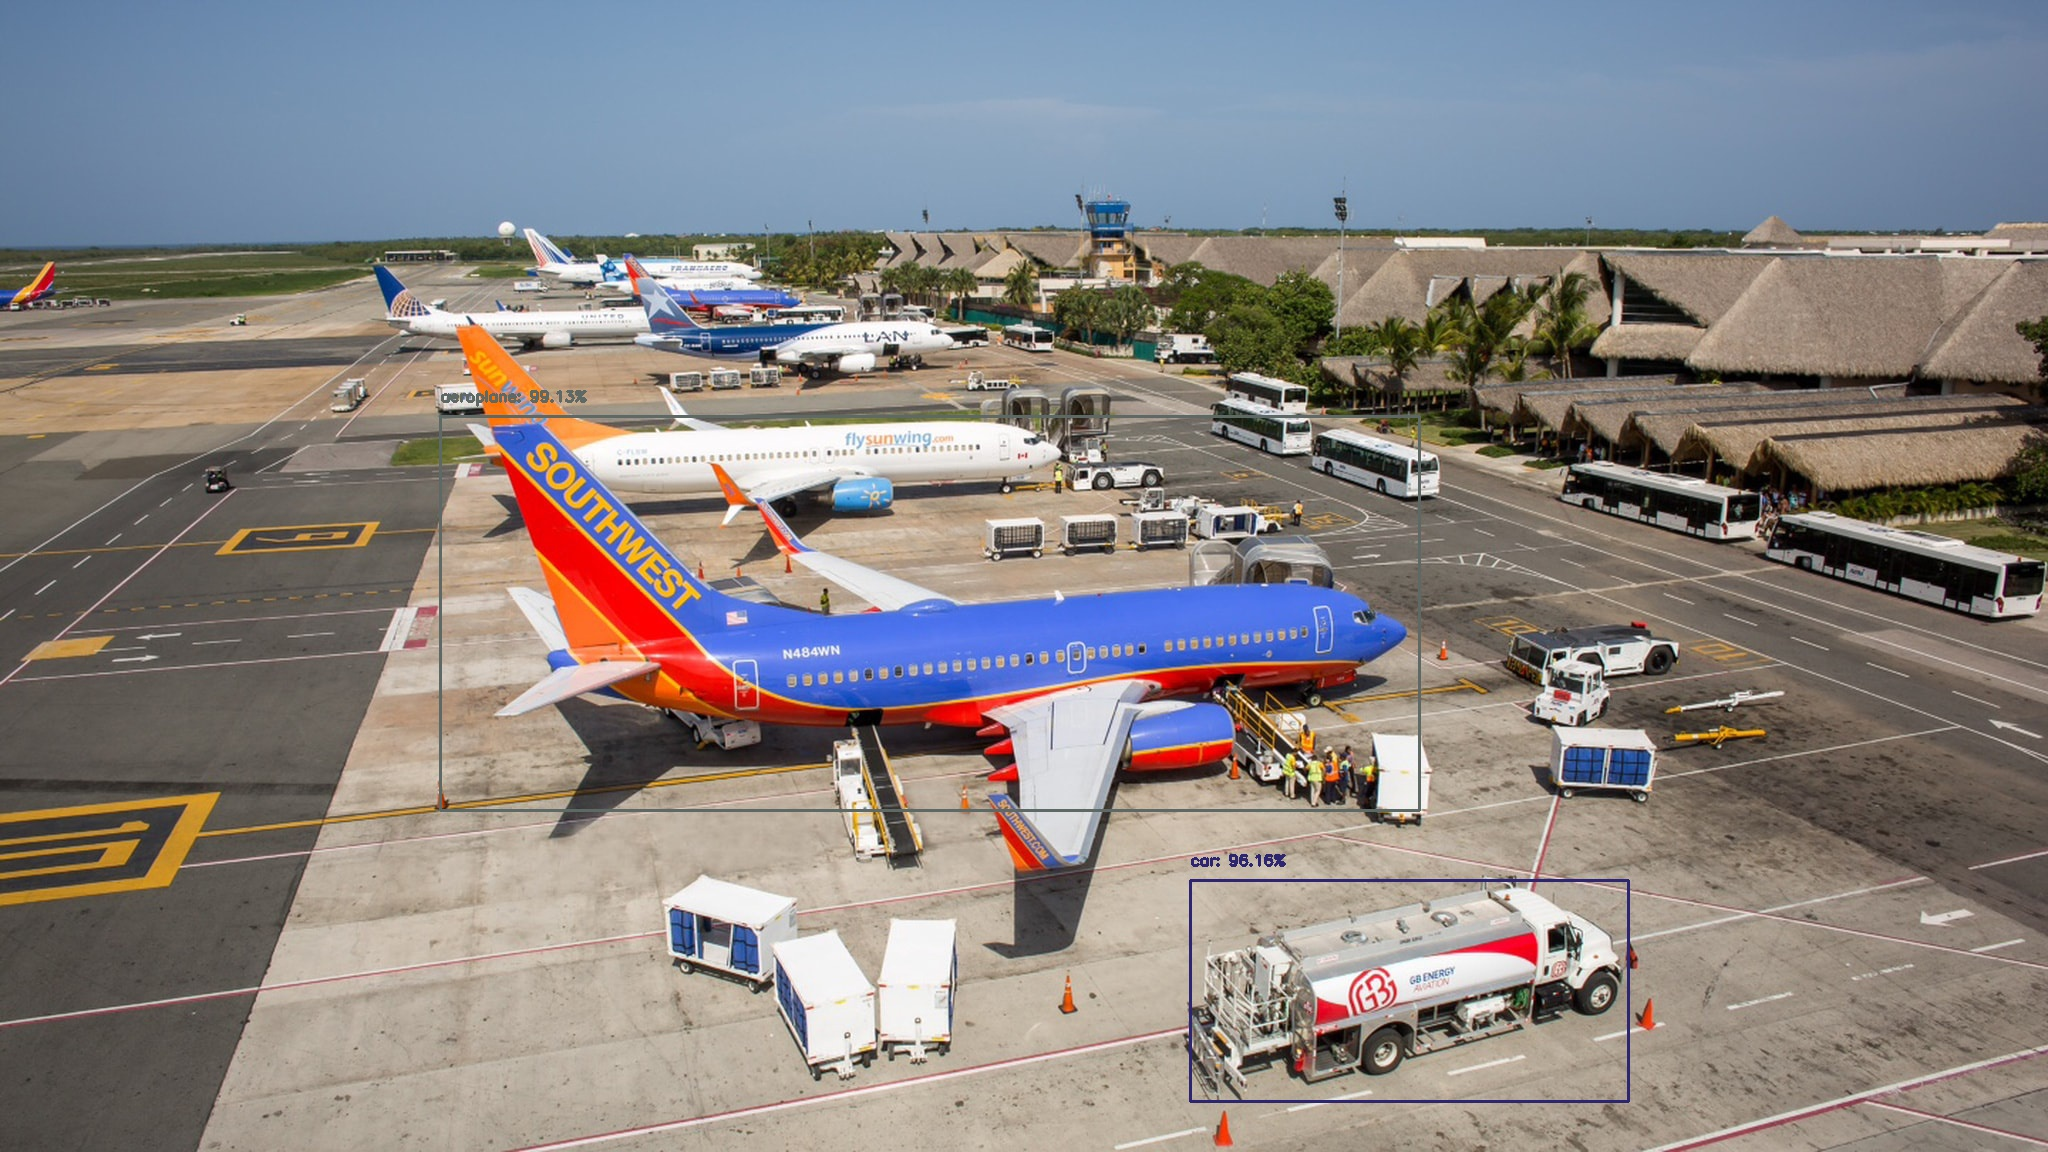

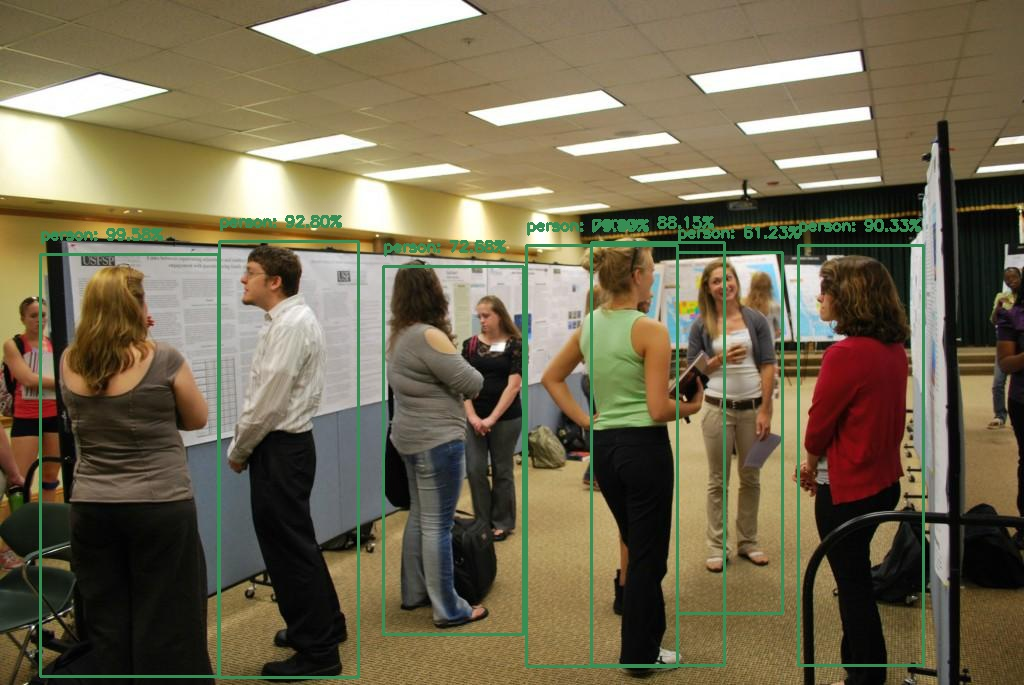

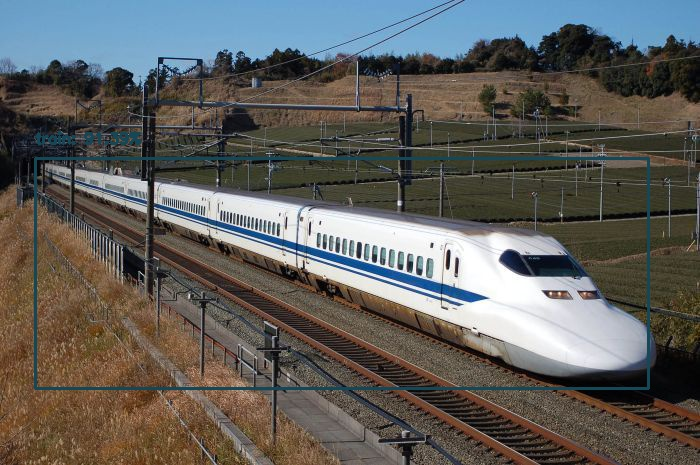

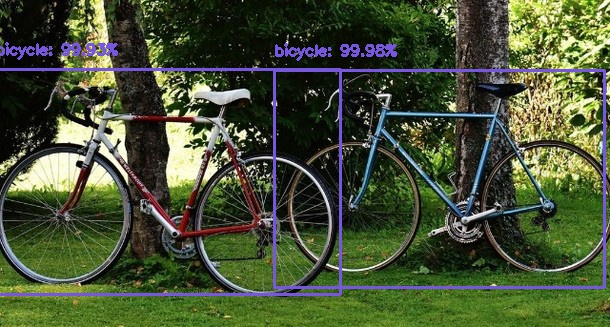

In [17]:
path=glob.glob('results//*jpg')

for i in path:
    display(Image(i))

(960, 960, 3)
[INFO] computing object detections...
[INFO] person: 99.79%


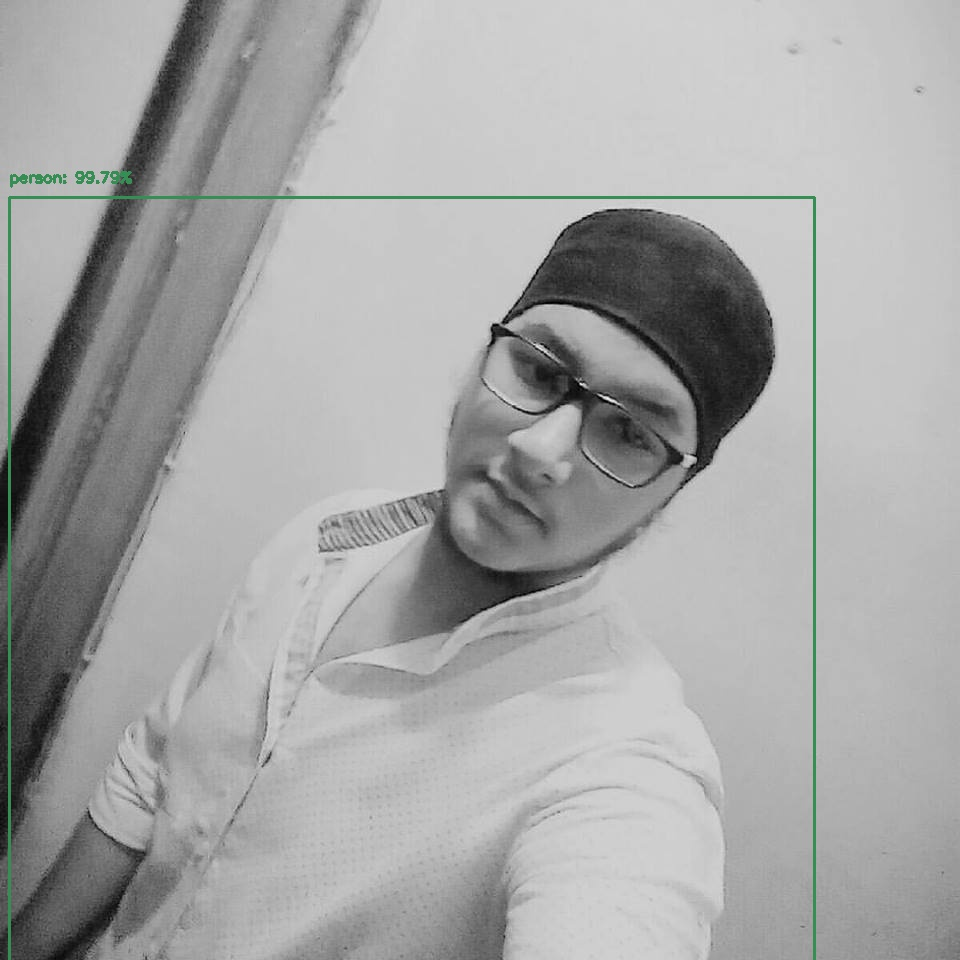

In [32]:
image=cv2.imread('JASNEET.jpeg')
print(image.shape)
image=object_detection(image)
cv2.imwrite('Jasneet_result.jpg',image)
display(Image('Jasneet_result.jpg'))

# Applying Model on Videos

In [36]:
# Applying on 1st video

path = 'seq02-img-left/*.png'

all_images=np.sort(glob.glob(path))
# # print(all_images)
# calculating frame per second 
fps = FPS().start()
for i in all_images:
#     reading the images from folder
    image=cv2.imread(i,1)
#     calling function
    image=object_detection(image)
    cv2.imshow('image',image)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
        
    fps.update()
    fps.stop()
    font = cv2.FONT_HERSHEY_SIMPLEX
    # cv2.putText(image,"FPS: {:.2f}".format(fps.fps()),(20,50), font, 1,(0,255,0),2,cv2.LINE_AA)

    print("[INFO] approx. FPS: {:.2f}".format(fps.fps()))



cv2.destroyAllWindows()

[INFO] computing object detections...
[INFO] person: 60.27%
[INFO] approx. FPS: 0.24
[INFO] computing object detections...
[INFO] approx. FPS: 0.46
[INFO] computing object detections...
[INFO] approx. FPS: 0.67
[INFO] computing object detections...
[INFO] approx. FPS: 0.87
[INFO] computing object detections...
[INFO] approx. FPS: 1.05
[INFO] computing object detections...
[INFO] approx. FPS: 1.23
[INFO] computing object detections...
[INFO] approx. FPS: 1.39
[INFO] computing object detections...
[INFO] approx. FPS: 1.54
[INFO] computing object detections...
[INFO] approx. FPS: 1.65
[INFO] computing object detections...
[INFO] approx. FPS: 1.78
[INFO] computing object detections...
[INFO] approx. FPS: 1.92
[INFO] computing object detections...
[INFO] approx. FPS: 2.05
[INFO] computing object detections...
[INFO] person: 69.45%
[INFO] approx. FPS: 2.17
[INFO] computing object detections...
[INFO] approx. FPS: 2.28
[INFO] computing object detections...
[INFO] approx. FPS: 2.38
[INFO] comp

[INFO] person: 62.58%
[INFO] approx. FPS: 5.34
[INFO] computing object detections...
[INFO] person: 72.35%
[INFO] person: 63.20%
[INFO] approx. FPS: 5.35
[INFO] computing object detections...
[INFO] person: 62.86%
[INFO] approx. FPS: 5.35
[INFO] computing object detections...
[INFO] person: 66.78%
[INFO] approx. FPS: 5.35
[INFO] computing object detections...
[INFO] person: 74.36%
[INFO] person: 71.45%
[INFO] person: 64.39%
[INFO] approx. FPS: 5.36
[INFO] computing object detections...
[INFO] person: 82.52%
[INFO] person: 74.40%
[INFO] approx. FPS: 5.38
[INFO] computing object detections...
[INFO] person: 98.12%
[INFO] person: 91.76%
[INFO] person: 69.06%
[INFO] approx. FPS: 5.39
[INFO] computing object detections...
[INFO] person: 99.59%
[INFO] person: 85.15%
[INFO] person: 79.79%
[INFO] approx. FPS: 5.40
[INFO] computing object detections...
[INFO] person: 98.42%
[INFO] person: 89.98%
[INFO] person: 75.32%
[INFO] approx. FPS: 5.42
[INFO] computing object detections...
[INFO] person: 

[INFO] person: 99.84%
[INFO] person: 99.75%
[INFO] person: 94.08%
[INFO] approx. FPS: 5.89
[INFO] computing object detections...
[INFO] person: 99.94%
[INFO] person: 92.11%
[INFO] person: 86.90%
[INFO] approx. FPS: 5.89
[INFO] computing object detections...
[INFO] person: 99.93%
[INFO] person: 95.44%
[INFO] person: 67.35%
[INFO] approx. FPS: 5.90
[INFO] computing object detections...
[INFO] person: 99.93%
[INFO] person: 77.30%
[INFO] approx. FPS: 5.90
[INFO] computing object detections...
[INFO] person: 99.76%
[INFO] person: 87.51%
[INFO] approx. FPS: 5.91
[INFO] computing object detections...
[INFO] person: 99.89%
[INFO] person: 83.53%
[INFO] person: 78.81%
[INFO] approx. FPS: 5.92
[INFO] computing object detections...
[INFO] person: 99.10%
[INFO] person: 93.43%
[INFO] person: 74.36%
[INFO] approx. FPS: 5.92
[INFO] computing object detections...
[INFO] person: 96.55%
[INFO] person: 87.69%
[INFO] person: 79.51%
[INFO] approx. FPS: 5.93
[INFO] computing object detections...
[INFO] perso

[INFO] bus: 69.52%
[INFO] person: 64.79%
[INFO] person: 63.75%
[INFO] person: 60.59%
[INFO] approx. FPS: 6.13
[INFO] computing object detections...
[INFO] bus: 69.79%
[INFO] person: 73.31%
[INFO] person: 70.46%
[INFO] approx. FPS: 6.13
[INFO] computing object detections...
[INFO] person: 69.53%
[INFO] person: 62.37%
[INFO] approx. FPS: 6.13
[INFO] computing object detections...
[INFO] car: 72.83%
[INFO] approx. FPS: 6.14
[INFO] computing object detections...
[INFO] car: 66.60%
[INFO] person: 74.09%
[INFO] person: 62.73%
[INFO] person: 61.64%
[INFO] approx. FPS: 6.14
[INFO] computing object detections...
[INFO] person: 69.36%
[INFO] person: 62.11%
[INFO] approx. FPS: 6.14
[INFO] computing object detections...
[INFO] car: 73.52%
[INFO] approx. FPS: 6.15
[INFO] computing object detections...
[INFO] car: 66.12%
[INFO] person: 80.93%
[INFO] person: 68.56%
[INFO] approx. FPS: 6.15
[INFO] computing object detections...
[INFO] person: 62.31%
[INFO] approx. FPS: 6.16
[INFO] computing object det

[INFO] person: 75.46%
[INFO] person: 73.20%
[INFO] approx. FPS: 6.30
[INFO] computing object detections...
[INFO] person: 68.12%
[INFO] approx. FPS: 6.30
[INFO] computing object detections...
[INFO] approx. FPS: 6.30
[INFO] computing object detections...
[INFO] person: 60.31%
[INFO] approx. FPS: 6.30
[INFO] computing object detections...
[INFO] person: 76.09%
[INFO] approx. FPS: 6.30
[INFO] computing object detections...
[INFO] person: 77.05%
[INFO] person: 68.98%
[INFO] approx. FPS: 6.30
[INFO] computing object detections...
[INFO] person: 71.51%
[INFO] person: 67.28%
[INFO] person: 63.32%
[INFO] approx. FPS: 6.30
[INFO] computing object detections...
[INFO] person: 80.30%
[INFO] person: 69.18%
[INFO] approx. FPS: 6.30
[INFO] computing object detections...
[INFO] person: 92.53%
[INFO] approx. FPS: 6.30
[INFO] computing object detections...
[INFO] person: 96.98%
[INFO] person: 63.00%
[INFO] person: 60.44%
[INFO] approx. FPS: 6.30
[INFO] computing object detections...
[INFO] person: 99.

[INFO] person: 97.41%
[INFO] person: 86.95%
[INFO] person: 84.48%
[INFO] person: 78.61%
[INFO] person: 66.92%
[INFO] approx. FPS: 6.38
[INFO] computing object detections...
[INFO] person: 69.29%
[INFO] person: 64.42%
[INFO] person: 62.83%
[INFO] person: 60.76%
[INFO] approx. FPS: 6.37
[INFO] computing object detections...
[INFO] person: 65.39%
[INFO] person: 65.26%
[INFO] person: 61.41%
[INFO] approx. FPS: 6.37
[INFO] computing object detections...
[INFO] person: 82.85%
[INFO] person: 63.52%
[INFO] approx. FPS: 6.38
[INFO] computing object detections...
[INFO] person: 89.60%
[INFO] person: 64.74%
[INFO] person: 61.86%
[INFO] approx. FPS: 6.38
[INFO] computing object detections...
[INFO] person: 62.27%
[INFO] approx. FPS: 6.38
[INFO] computing object detections...
[INFO] person: 80.56%
[INFO] person: 68.75%
[INFO] person: 68.32%
[INFO] person: 64.91%
[INFO] approx. FPS: 6.38
[INFO] computing object detections...
[INFO] person: 82.92%
[INFO] person: 81.64%
[INFO] person: 81.19%
[INFO] pe

[INFO] person: 99.31%
[INFO] person: 96.36%
[INFO] person: 92.87%
[INFO] person: 76.67%
[INFO] person: 61.32%
[INFO] approx. FPS: 6.30
[INFO] computing object detections...
[INFO] person: 99.62%
[INFO] person: 86.67%
[INFO] person: 74.68%
[INFO] person: 65.20%
[INFO] approx. FPS: 6.30
[INFO] computing object detections...
[INFO] person: 97.39%
[INFO] person: 95.00%
[INFO] person: 83.36%
[INFO] person: 67.59%
[INFO] approx. FPS: 6.30
[INFO] computing object detections...
[INFO] person: 89.28%
[INFO] person: 88.88%
[INFO] person: 74.80%
[INFO] person: 65.59%
[INFO] approx. FPS: 6.30
[INFO] computing object detections...
[INFO] person: 88.08%
[INFO] person: 80.16%
[INFO] person: 70.91%
[INFO] approx. FPS: 6.30
[INFO] computing object detections...
[INFO] person: 89.69%
[INFO] person: 82.48%
[INFO] person: 74.95%
[INFO] person: 65.81%
[INFO] approx. FPS: 6.29
[INFO] computing object detections...
[INFO] person: 98.31%
[INFO] person: 94.06%
[INFO] person: 92.92%
[INFO] approx. FPS: 6.29
[IN

[INFO] car: 75.72%
[INFO] person: 88.86%
[INFO] person: 83.89%
[INFO] person: 75.82%
[INFO] person: 72.34%
[INFO] person: 67.48%
[INFO] person: 65.93%
[INFO] approx. FPS: 6.36
[INFO] computing object detections...
[INFO] car: 79.33%
[INFO] person: 88.21%
[INFO] person: 86.36%
[INFO] person: 73.05%
[INFO] person: 72.29%
[INFO] person: 64.90%
[INFO] approx. FPS: 6.36
[INFO] computing object detections...
[INFO] car: 64.93%
[INFO] person: 90.97%
[INFO] person: 84.22%
[INFO] person: 77.64%
[INFO] person: 75.74%
[INFO] person: 67.11%
[INFO] approx. FPS: 6.36
[INFO] computing object detections...
[INFO] car: 64.85%
[INFO] person: 91.47%
[INFO] person: 84.44%
[INFO] person: 78.21%
[INFO] person: 75.77%
[INFO] person: 74.11%
[INFO] person: 67.53%
[INFO] person: 67.38%
[INFO] person: 60.22%
[INFO] approx. FPS: 6.36
[INFO] computing object detections...
[INFO] person: 98.95%
[INFO] person: 87.83%
[INFO] person: 79.33%
[INFO] person: 72.58%
[INFO] approx. FPS: 6.36
[INFO] computing object detecti

[INFO] person: 98.31%
[INFO] person: 96.36%
[INFO] person: 91.67%
[INFO] person: 85.81%
[INFO] person: 61.08%
[INFO] approx. FPS: 6.39
[INFO] computing object detections...
[INFO] bus: 67.03%
[INFO] person: 91.07%
[INFO] person: 89.31%
[INFO] person: 89.05%
[INFO] person: 77.61%
[INFO] approx. FPS: 6.39
[INFO] computing object detections...
[INFO] person: 90.85%
[INFO] person: 88.94%
[INFO] person: 86.39%
[INFO] person: 85.83%
[INFO] approx. FPS: 6.39
[INFO] computing object detections...
[INFO] person: 91.42%
[INFO] person: 90.03%
[INFO] person: 85.25%
[INFO] person: 73.24%
[INFO] approx. FPS: 6.39
[INFO] computing object detections...
[INFO] person: 93.99%
[INFO] person: 86.44%
[INFO] person: 81.51%
[INFO] person: 74.15%
[INFO] person: 60.15%
[INFO] approx. FPS: 6.39
[INFO] computing object detections...
[INFO] person: 95.11%
[INFO] person: 91.27%
[INFO] person: 84.89%
[INFO] person: 68.22%
[INFO] person: 63.97%
[INFO] approx. FPS: 6.40
[INFO] computing object detections...
[INFO] pe

[INFO] person: 98.90%
[INFO] person: 73.87%
[INFO] approx. FPS: 6.37
[INFO] computing object detections...
[INFO] person: 99.27%
[INFO] person: 88.65%
[INFO] person: 79.38%
[INFO] approx. FPS: 6.37
[INFO] computing object detections...
[INFO] person: 99.82%
[INFO] person: 89.68%
[INFO] person: 69.37%
[INFO] approx. FPS: 6.37
[INFO] computing object detections...
[INFO] person: 99.40%
[INFO] person: 84.38%
[INFO] approx. FPS: 6.37
[INFO] computing object detections...
[INFO] person: 77.30%
[INFO] person: 71.50%
[INFO] approx. FPS: 6.37
[INFO] computing object detections...
[INFO] person: 93.06%
[INFO] person: 71.12%
[INFO] approx. FPS: 6.37
[INFO] computing object detections...
[INFO] person: 94.39%
[INFO] approx. FPS: 6.37
[INFO] computing object detections...
[INFO] person: 96.42%
[INFO] approx. FPS: 6.38
[INFO] computing object detections...
[INFO] person: 98.12%
[INFO] approx. FPS: 6.38
[INFO] computing object detections...
[INFO] person: 96.60%
[INFO] person: 61.08%
[INFO] approx. 

[INFO] person: 72.00%
[INFO] person: 68.86%
[INFO] person: 61.44%
[INFO] approx. FPS: 6.40
[INFO] computing object detections...
[INFO] person: 77.80%
[INFO] person: 75.80%
[INFO] approx. FPS: 6.40
[INFO] computing object detections...
[INFO] person: 82.63%
[INFO] person: 78.33%
[INFO] approx. FPS: 6.40
[INFO] computing object detections...
[INFO] person: 82.47%
[INFO] person: 78.41%
[INFO] approx. FPS: 6.40
[INFO] computing object detections...
[INFO] person: 83.55%
[INFO] person: 72.93%
[INFO] person: 67.11%
[INFO] approx. FPS: 6.40
[INFO] computing object detections...
[INFO] person: 96.18%
[INFO] person: 90.69%
[INFO] person: 66.12%
[INFO] approx. FPS: 6.40
[INFO] computing object detections...
[INFO] person: 98.72%
[INFO] person: 89.79%
[INFO] person: 76.61%
[INFO] approx. FPS: 6.40
[INFO] computing object detections...
[INFO] person: 99.79%
[INFO] person: 93.00%
[INFO] approx. FPS: 6.40
[INFO] computing object detections...
[INFO] chair: 65.16%
[INFO] person: 98.92%
[INFO] person

[INFO] bus: 79.81%
[INFO] person: 86.74%
[INFO] person: 85.64%
[INFO] person: 84.20%
[INFO] person: 68.70%
[INFO] approx. FPS: 6.37
[INFO] computing object detections...
[INFO] bus: 73.71%
[INFO] person: 88.71%
[INFO] person: 79.34%
[INFO] person: 78.83%
[INFO] person: 75.22%
[INFO] approx. FPS: 6.37
[INFO] computing object detections...
[INFO] bus: 83.51%
[INFO] person: 90.37%
[INFO] person: 86.78%
[INFO] person: 82.72%
[INFO] person: 78.99%
[INFO] approx. FPS: 6.37
[INFO] computing object detections...
[INFO] bus: 77.88%
[INFO] person: 87.67%
[INFO] person: 80.90%
[INFO] person: 74.40%
[INFO] person: 73.89%
[INFO] approx. FPS: 6.37
[INFO] computing object detections...
[INFO] bus: 83.60%
[INFO] person: 83.71%
[INFO] person: 81.43%
[INFO] person: 79.98%
[INFO] person: 79.42%
[INFO] approx. FPS: 6.37
[INFO] computing object detections...
[INFO] bus: 71.26%
[INFO] person: 87.18%
[INFO] person: 80.82%
[INFO] person: 75.99%
[INFO] person: 71.50%
[INFO] approx. FPS: 6.37
[INFO] computing o

[INFO] person: 95.23%
[INFO] person: 90.36%
[INFO] person: 76.28%
[INFO] approx. FPS: 6.43
[INFO] computing object detections...
[INFO] person: 95.51%
[INFO] person: 93.72%
[INFO] person: 66.53%
[INFO] approx. FPS: 6.43
[INFO] computing object detections...
[INFO] person: 94.45%
[INFO] person: 84.46%
[INFO] person: 74.77%
[INFO] person: 64.94%
[INFO] approx. FPS: 6.43
[INFO] computing object detections...
[INFO] person: 97.13%
[INFO] person: 84.72%
[INFO] person: 75.53%
[INFO] person: 69.16%
[INFO] approx. FPS: 6.43
[INFO] computing object detections...
[INFO] person: 98.59%
[INFO] person: 90.67%
[INFO] person: 67.56%
[INFO] approx. FPS: 6.43
[INFO] computing object detections...
[INFO] person: 98.93%
[INFO] person: 91.84%
[INFO] person: 79.56%
[INFO] approx. FPS: 6.43
[INFO] computing object detections...
[INFO] person: 97.42%
[INFO] person: 97.08%
[INFO] approx. FPS: 6.43
[INFO] computing object detections...
[INFO] person: 96.47%
[INFO] person: 95.34%
[INFO] approx. FPS: 6.43
[INFO]

[INFO] person: 99.10%
[INFO] person: 94.68%
[INFO] approx. FPS: 6.47
[INFO] computing object detections...
[INFO] person: 97.88%
[INFO] person: 92.11%
[INFO] approx. FPS: 6.48
[INFO] computing object detections...
[INFO] person: 98.88%
[INFO] person: 97.46%
[INFO] person: 63.73%
[INFO] approx. FPS: 6.48
[INFO] computing object detections...
[INFO] person: 98.13%
[INFO] person: 96.69%
[INFO] approx. FPS: 6.48
[INFO] computing object detections...
[INFO] person: 98.74%
[INFO] person: 95.27%
[INFO] person: 67.33%
[INFO] approx. FPS: 6.48
[INFO] computing object detections...
[INFO] person: 96.83%
[INFO] person: 95.64%
[INFO] approx. FPS: 6.48
[INFO] computing object detections...
[INFO] person: 97.13%
[INFO] person: 94.12%
[INFO] approx. FPS: 6.48
[INFO] computing object detections...
[INFO] person: 97.08%
[INFO] person: 89.55%
[INFO] approx. FPS: 6.48
[INFO] computing object detections...
[INFO] bus: 63.56%
[INFO] person: 89.20%
[INFO] person: 81.67%
[INFO] person: 60.72%
[INFO] approx. 

[INFO] person: 98.57%
[INFO] person: 85.26%
[INFO] person: 69.21%
[INFO] approx. FPS: 6.51
[INFO] computing object detections...
[INFO] person: 97.72%
[INFO] person: 70.22%
[INFO] person: 67.37%
[INFO] approx. FPS: 6.51
[INFO] computing object detections...
[INFO] person: 98.31%
[INFO] person: 71.78%
[INFO] approx. FPS: 6.51
[INFO] computing object detections...
[INFO] person: 99.60%
[INFO] approx. FPS: 6.51
[INFO] computing object detections...
[INFO] person: 99.49%
[INFO] person: 94.95%
[INFO] approx. FPS: 6.51
[INFO] computing object detections...
[INFO] person: 99.26%
[INFO] person: 87.33%
[INFO] person: 72.72%
[INFO] approx. FPS: 6.51
[INFO] computing object detections...
[INFO] person: 99.78%
[INFO] person: 82.90%
[INFO] approx. FPS: 6.51
[INFO] computing object detections...
[INFO] person: 99.89%
[INFO] person: 76.71%
[INFO] approx. FPS: 6.51
[INFO] computing object detections...
[INFO] person: 99.85%
[INFO] person: 72.07%
[INFO] approx. FPS: 6.51
[INFO] computing object detecti

[INFO] person: 99.97%
[INFO] person: 98.33%
[INFO] person: 95.91%
[INFO] approx. FPS: 6.54
[INFO] computing object detections...
[INFO] person: 99.86%
[INFO] person: 97.45%
[INFO] person: 97.08%
[INFO] approx. FPS: 6.54
[INFO] computing object detections...
[INFO] person: 99.91%
[INFO] person: 81.16%
[INFO] person: 80.38%
[INFO] approx. FPS: 6.54
[INFO] computing object detections...
[INFO] person: 99.89%
[INFO] person: 95.22%
[INFO] approx. FPS: 6.54
[INFO] computing object detections...
[INFO] person: 99.87%
[INFO] person: 98.64%
[INFO] person: 72.80%
[INFO] approx. FPS: 6.54
[INFO] computing object detections...
[INFO] person: 99.95%
[INFO] person: 95.37%
[INFO] person: 94.61%
[INFO] approx. FPS: 6.54
[INFO] computing object detections...
[INFO] person: 99.64%
[INFO] person: 98.83%
[INFO] person: 82.87%
[INFO] approx. FPS: 6.54
[INFO] computing object detections...
[INFO] person: 99.96%
[INFO] person: 99.33%
[INFO] person: 90.93%
[INFO] approx. FPS: 6.54
[INFO] computing object dete

[INFO] approx. FPS: 6.56
[INFO] computing object detections...
[INFO] person: 97.59%
[INFO] approx. FPS: 6.56
[INFO] computing object detections...
[INFO] person: 99.18%
[INFO] person: 67.20%
[INFO] approx. FPS: 6.56
[INFO] computing object detections...
[INFO] person: 79.17%
[INFO] approx. FPS: 6.56
[INFO] computing object detections...
[INFO] person: 89.39%
[INFO] approx. FPS: 6.56
[INFO] computing object detections...
[INFO] person: 88.60%
[INFO] person: 87.49%
[INFO] approx. FPS: 6.56
[INFO] computing object detections...
[INFO] person: 83.73%
[INFO] person: 72.04%
[INFO] approx. FPS: 6.56
[INFO] computing object detections...
[INFO] person: 89.03%
[INFO] person: 87.93%
[INFO] approx. FPS: 6.56
[INFO] computing object detections...
[INFO] person: 93.00%
[INFO] person: 74.41%
[INFO] approx. FPS: 6.56
[INFO] computing object detections...
[INFO] person: 85.91%
[INFO] person: 70.69%
[INFO] approx. FPS: 6.56
[INFO] computing object detections...
[INFO] approx. FPS: 6.56
[INFO] computin

[INFO] bus: 63.66%
[INFO] person: 99.58%
[INFO] person: 82.68%
[INFO] person: 74.47%
[INFO] approx. FPS: 6.56
[INFO] computing object detections...
[INFO] person: 98.57%
[INFO] person: 87.10%
[INFO] person: 80.09%
[INFO] person: 73.95%
[INFO] person: 72.47%
[INFO] approx. FPS: 6.56
[INFO] computing object detections...
[INFO] person: 99.69%
[INFO] person: 97.37%
[INFO] person: 62.75%
[INFO] approx. FPS: 6.56
[INFO] computing object detections...
[INFO] person: 99.94%
[INFO] person: 81.23%
[INFO] approx. FPS: 6.56
[INFO] computing object detections...
[INFO] person: 99.88%
[INFO] person: 99.85%
[INFO] approx. FPS: 6.56
[INFO] computing object detections...
[INFO] person: 99.75%
[INFO] person: 97.63%
[INFO] approx. FPS: 6.56
[INFO] computing object detections...
[INFO] person: 99.92%
[INFO] person: 99.72%
[INFO] person: 68.19%
[INFO] approx. FPS: 6.57
[INFO] computing object detections...
[INFO] person: 99.47%
[INFO] person: 99.35%
[INFO] approx. FPS: 6.57
[INFO] computing object detecti

In [ ]:
#Applying on 2nd video
